# Boston House Price

In [0]:
def columnReplace(columns):
  new_column = []
  for i in columns:
    v = i.replace(" ", "_")
    new_column.append(v)
  return new_column

In [0]:
import numpy as np
from sklearn import datasets 
from collections import Counter as cc
import pandas as pd
import sqlite3
import os

##To SQL

In [0]:
boston = datasets.load_boston()

In [0]:
pd_iris_target = pd.DataFrame(iris.target, columns=['target'])

NameError: ignored

In [0]:
pd_boston = pd.DataFrame(boston['data'], columns=boston['feature_names'])

In [0]:
conn = sqlite3.connect('boston.db')

In [0]:
pd_boston.to_sql('boston_table', conn, if_exists='replace')

## DES


In [0]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [0]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
len(boston.data[0])

13

In [0]:
boston.target # 가격

## 기술통계

In [0]:
matt = []

for i in range(len(boston.feature_names)):
  print(boston.feature_names[i])

  x = boston.data[:, i]
  
  x_min = x.min()
  x_max = x.max()
  x_mean = x.mean()
  x_var = x.var()
  x_std = x.std()
  x_median = np.median(x)
  x_cnt = cc(x) # 데이터에서 가장 많이 나온 값 카운트
  x_cntmax = x_cnt.most_common(1)
  x_cntmax = x_cntmax[0][0]

  mask_1 = ((x >= x_mean - 0.05*x_mean) & (x <= x_mean + 0.05*x_mean))
  mask_2 = ((x >= x_median - 0.05*x_median) & (x <= x_median + 0.05*x_median))
  mask_3 = ((x >= x_cntmax - 0.05*x_cntmax) & (x <= x_cntmax + 0.05*x_cntmax))

  selected_1 = x[mask_1]
  selected_2 = x[mask_2]
  selected_3 = x[mask_3]

  print('평균 :', x_mean)
  print('중앙값 :', x_median)
  # print('분산 :', x_var)
  print('표준편차 :', x_std)
  print('최대값 :', x_max)
  print('최소값 :', x_min)
  print('최빈값 :', x_cntmax)
  print('\n')
  
  print('')
  if max(len(selected_1), len(selected_2), len(selected_3)) == len(selected_1):
    print('대푯값 :', '평균({})'.format(x_mean))
  elif max(len(selected_1), len(selected_2), len(selected_3)) == len(selected_2):
    print('대푯값 :', '중앙값({})'.format(x_median))
  else:
    print('대푯값 :', '최빈값({})'.format(x_cntmax))
  print('\n')
  matt += [x_mean, x_median, x_std, x_var]
matt = np.array(matt)






CRIM
평균 : 3.613523557312254
중앙값 : 0.25651
표준편차 : 8.59304135129577
최대값 : 88.9762
최소값 : 0.00632
최빈값 : 0.01501



대푯값 : 중앙값(0.25651)


ZN
평균 : 11.363636363636363
중앙값 : 0.0
표준편차 : 23.29939569476613
최대값 : 100.0
최소값 : 0.0
최빈값 : 0.0



대푯값 : 중앙값(0.0)


INDUS
평균 : 11.13677865612648
중앙값 : 9.69
표준편차 : 6.853570583390874
최대값 : 27.74
최소값 : 0.46
최빈값 : 18.1



대푯값 : 최빈값(18.1)


CHAS
평균 : 0.0691699604743083
중앙값 : 0.0
표준편차 : 0.2537429349603471
최대값 : 1.0
최소값 : 0.0
최빈값 : 0.0



대푯값 : 중앙값(0.0)


NOX
평균 : 0.5546950592885376
중앙값 : 0.538
표준편차 : 0.11576311540656137
최대값 : 0.871
최소값 : 0.385
최빈값 : 0.538



대푯값 : 중앙값(0.538)


RM
평균 : 6.284634387351779
중앙값 : 6.2085
표준편차 : 0.7019225143345689
최대값 : 8.78
최소값 : 3.561
최빈값 : 5.713



대푯값 : 중앙값(6.2085)


AGE
평균 : 68.57490118577076
중앙값 : 77.5
표준편차 : 28.121032570236867
최대값 : 100.0
최소값 : 2.9
최빈값 : 100.0



대푯값 : 최빈값(100.0)


DIS
평균 : 3.795042687747036
중앙값 : 3.2074499999999997
표준편차 : 2.1036283563444593
최대값 : 12.1265
최소값 : 1.1296
최빈값 : 3.4952



대푯값 : 평균(3.795042687747036)




In [0]:
matt

array([3.61352356e+00, 2.56510000e-01, 8.59304135e+00, 7.38403597e+01,
       1.13636364e+01, 0.00000000e+00, 2.32993957e+01, 5.42861840e+02,
       1.11367787e+01, 9.69000000e+00, 6.85357058e+00, 4.69714297e+01,
       6.91699605e-02, 0.00000000e+00, 2.53742935e-01, 6.43854770e-02,
       5.54695059e-01, 5.38000000e-01, 1.15763115e-01, 1.34010989e-02,
       6.28463439e+00, 6.20850000e+00, 7.01922514e-01, 4.92695216e-01,
       6.85749012e+01, 7.75000000e+01, 2.81210326e+01, 7.90792473e+02,
       3.79504269e+00, 3.20745000e+00, 2.10362836e+00, 4.42525226e+00,
       9.54940711e+00, 5.00000000e+00, 8.69865112e+00, 7.56665313e+01,
       4.08237154e+02, 3.30000000e+02, 1.68370495e+02, 2.83486236e+04,
       1.84555336e+01, 1.90500000e+01, 2.16280519e+00, 4.67772630e+00,
       3.56674032e+02, 3.91440000e+02, 9.12046075e+01, 8.31828042e+03,
       1.26530632e+01, 1.13600000e+01, 7.13400164e+00, 5.08939794e+01])

In [0]:
from matplotlib import pyplot as plt 



In [0]:
fea = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']

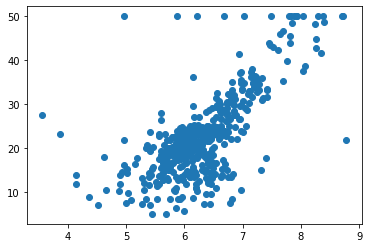

In [0]:
plt.scatter(boston.data[:, 5], boston.target) # 범죄율 집값 관계

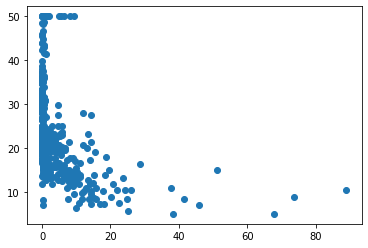

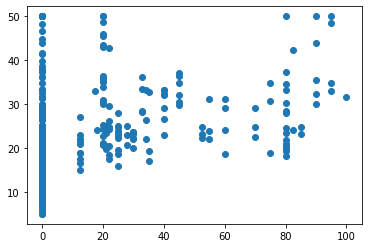

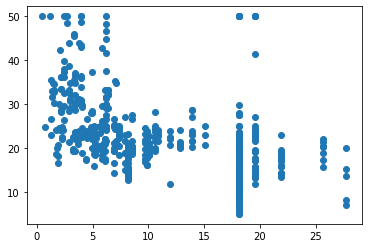

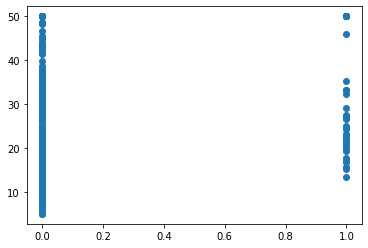

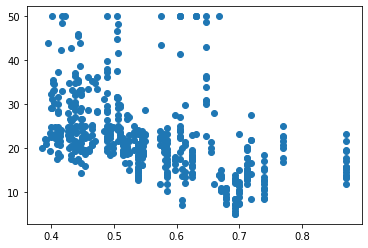

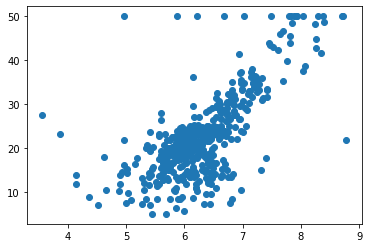

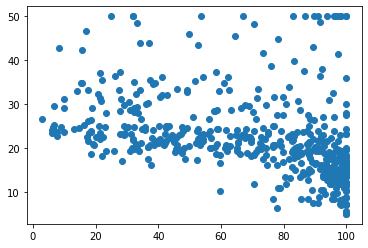

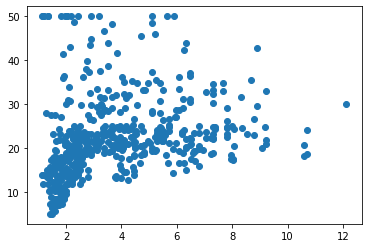

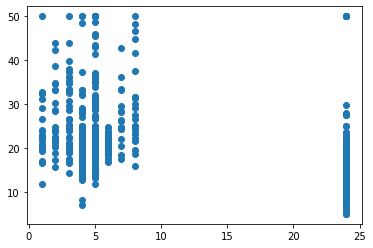

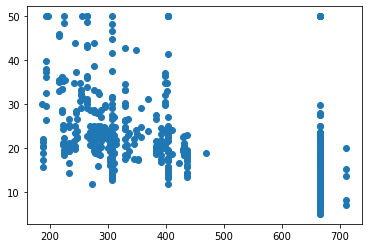

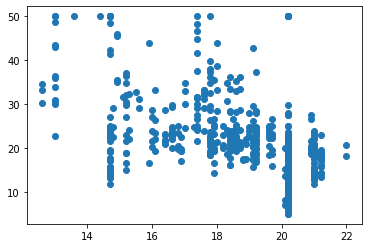

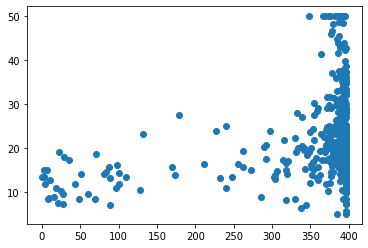

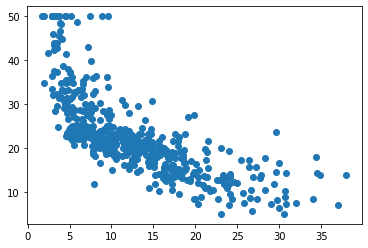

In [0]:
for i in range(len(boston.feature_names)):
  plt.scatter(boston.data[:, i], boston.target)
  plt.show()


### LinearRegression

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [0]:
boston_dataset = datasets.load_boston()
boston_data = boston_dataset.data
boston_target = boston_dataset.target
train_boston_data, test_boston_data, train_boston_target, test_boston_target = train_test_split(boston_data, boston_target, test_size=0.2)

In [0]:
linearRegression = LinearRegression()

In [7]:
linearRegression.fit(train_boston_data, train_boston_target)
linearRegression.score(test_boston_data, test_boston_target)


0.7640288421725527

In [0]:
coef_df = pd.DataFrame(linearRegression.coef_, columns=['Coefficient'], index = boston_dataset.feature_names)

In [9]:
linearRegression.intercept_


40.88736756764297

In [10]:
 linearRegression.coef_

array([-1.02739654e-01,  4.42257560e-02, -2.05131842e-02,  2.79946078e+00,
       -1.69366273e+01,  3.31207131e+00,  3.05409614e-03, -1.51092339e+00,
        3.30059257e-01, -1.27760841e-02, -1.00332794e+00,  9.16968901e-03,
       -5.52586745e-01])

In [18]:
result = dict()
from sklearn.linear_model import Ridge
for i in range(1,10):
  alpha = i * 0.1
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_boston_data, train_boston_target)
  result['ridge_' + str(i)] = ridge.score(test_boston_data, test_boston_target)

result

{'ridge_1': 0.7634935296135411,
 'ridge_2': 0.7629287665365433,
 'ridge_3': 0.7623570298883565,
 'ridge_4': 0.7617916230328747,
 'ridge_5': 0.7612402755388566,
 'ridge_6': 0.7607072822647093,
 'ridge_7': 0.7601948037005781,
 'ridge_8': 0.7597036713618827,
 'ridge_9': 0.7592338941601693}

In [15]:
result = dict()
from sklearn.linear_model import Lasso
for i in range(1,10):
  alpha = i * 0.1
  ridge = Lasso(alpha=alpha)
  ridge.fit(train_boston_data, train_boston_target)
  result['ridge_' + str(i)] = ridge.score(test_boston_data, test_boston_target)

result

{'ridge_1': 0.7396605295118013,
 'ridge_2': 0.7304782692866394,
 'ridge_3': 0.7241338641642348,
 'ridge_4': 0.7174405222874075,
 'ridge_5': 0.7098658028019704,
 'ridge_6': 0.7016191558304271,
 'ridge_7': 0.6926996041634295,
 'ridge_8': 0.683107559333137,
 'ridge_9': 0.6728438100293903}

NameError: ignored

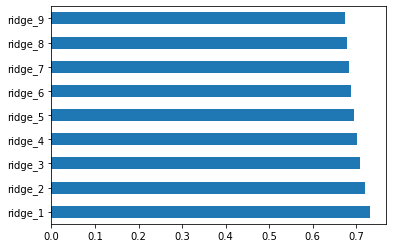

In [19]:
result = dict()
from sklearn.linear_model import ElasticNet
for i in range(1,10):
  alpha = i * 0.1
  ridge = ElasticNet(alpha=alpha)
  ridge.fit(train_boston_data, train_boston_target)
  result['ridge_' + str(i)] = ridge.score(test_boston_data, test_boston_target)

result
pd.Series(result).plot(kind='barh')
plt.show()